# Using NDVI after atmospheric correction 

NDVI is sensitive to reflectances equal to zero (or negative).

$$ NDVI=\frac{\rho_s(NIR)-\rho_s(RED)}{\rho_s(NIR)+\rho_s(RED)}$$

Inaccurate atmospheric correction can cause apparition of negative reflectance values. This can be due to the presence of cloud or topographic shadows, to an overestimate of the aerosol optical thickness (AOT), or to the use of a wrong aerosol type, or to an innaccurate correction of adjacency effects. The atmospheric correction softwares usually cast these values to zero. This happens especially over the visible bands, which are more sensitive to atmosphere, and for which surface reflectances over vegetation can be very low (~ 0.02).

A very simple modification of the NDVI formula can correct for this issue. This is what I try to show in this notebook.

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from pylab import *

In [2]:
#Standard NDVI
def compute_ndvi(RED,NIR):
    NDVI=(NIR-RED)/(NIR+RED)
    return NDVI

#Modified NDVI
def modified_ndvi(RED,NIR):
    RED=RED+0.05
    NDVI_MOD=(NIR-RED)/(NIR+RED)
    return NDVI_MOD


## Simulation  of surface reflectances with usual ranges of values

In [3]:
nb=10000

#random simulations of RED and NIR surface reflectances (uniform probability law)
RED=np.random.random_sample(nb)*0.1+0.01
NIR=np.random.random_sample(nb)*0.5+0.15

#Random simulation of noise with a gauwwian law with std=0.02 (a little bit exaggerated)
NoiseR=np.random.normal(0,0.02,nb)
NoiseN=np.random.normal(0,0.02,nb)

#Add noise to reflectance
RED_noise=RED+NoiseR
NIR_noise=NIR+NoiseN

#Cast negative values to zero
RED_noise=np.where(RED_noise<0,0,RED_noise)
NIR_noise=np.where(NIR_noise<0,0,NIR_noise)


# Plot effect of noise on standard NDVI

Note the NDVI=1 values due to refectances in the red, equal or close to zero. In the NDVI formula, if the RED reflectance is zero, then NDVI equals one, whatever the value of the Near Infrared surface reflectance (except zero).

$$ NDVI=\frac{NIR-RED}{NIR+RED} $$

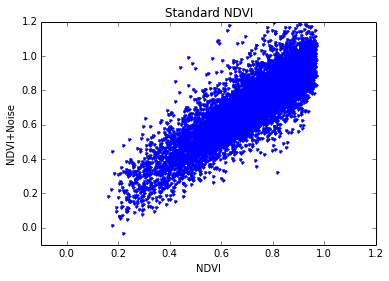

In [4]:
ndvi_ref=compute_ndvi(RED,NIR)
ndvi_noise=compute_ndvi(RED_noise,NIR_noise)


plot(ndvi_ref,ndvi_noise,'.')
ylim(-0.1,1.2)
xlim(-0.1,1.2)
title('Standard NDVI')
xlabel('NDVI')
ylabel('NDVI+Noise')
show()


# Plot effect of noise on modified NDVI

Note that the modified NDVI is much less sensitive to the errors on surface reflectance. It would even be much better not to cast values to zero


$$ NDVI=\frac{\rho_s(NIR)-(\rho_s(RED)+0.05)}{\rho_s(NIR)+(\rho_s(RED)+ 0.05)}$$

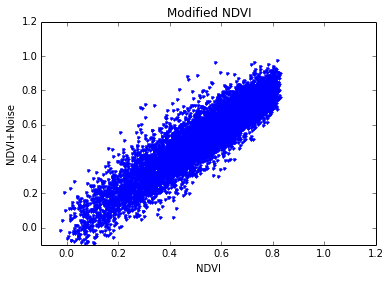

In [5]:
ndvi_ref=modified_ndvi(RED,NIR)
ndvi_noise=modified_ndvi(RED_noise,NIR_noise)


plot(ndvi_ref,ndvi_noise,'.')
ylim(-0.1,1.2)
xlim(-0.1,1.2)
title('Modified NDVI')
xlabel('NDVI')
ylabel('NDVI+Noise')
show()

**This plot looks much better !**

It is very probable that such a modified NDVI was already proposed in the litterature but did I not find it among the most famous ones, including the Atmospherically Resistant Vegetation Index.
Kaufman Y. J., Tanre D., 1992. Atmospherically Resistant Vegetation Index (ARVI) for EOS-MODIS, I.E.E.E. T geosci remote 30(2):261-270
    
So maybe should I call this one the ** Atmospheric COrrection Resistant Vegetation Index (ACORVI)** 

Yes, I can retire happily, now that I have defined my own vegetation index !
I hope none of my neighbours in conferences remember that I used to say that defining a vegetation was really something of the past